In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [227]:
df= pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [228]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [229]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [230]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [231]:
cat_cols= [col for col in df.columns if df[col].dtype== object]
cat_cols

['gender', 'smoking_history']

In [232]:
print(df.shape)
print('*'*30)
print(df.info())
print('*'*30)
print(df.describe())
print('*'*30)
print(df.isnull().sum())

(100000, 9)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
******************************
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420    

In [233]:
for col in df.columns:
    if df[col].dtype== object:
        print(col, df[col].value_counts(), sep= ":\n", end= "\n_____________\n")

gender:
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
_____________
smoking_history:
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
_____________


In [234]:
df['diabetes'].value_counts(), df['heart_disease'].value_counts(), df['hypertension'].value_counts()

(0    91500
 1     8500
 Name: diabetes, dtype: int64,
 0    96058
 1     3942
 Name: heart_disease, dtype: int64,
 0    92515
 1     7485
 Name: hypertension, dtype: int64)

In [235]:
df['diabetes'].value_counts()/len(df), df['heart_disease'].value_counts()/len(df), df['hypertension'].value_counts()/len(df)

(0    0.915
 1    0.085
 Name: diabetes, dtype: float64,
 0    0.96058
 1    0.03942
 Name: heart_disease, dtype: float64,
 0    0.92515
 1    0.07485
 Name: hypertension, dtype: float64)

In [236]:
df_encoded= pd.get_dummies(df, columns= cat_cols, drop_first= True)
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


In [237]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [238]:
df[df['gender']=='Other']['diabetes'].value_counts(), len(df)

(0    18
 Name: diabetes, dtype: int64,
 100000)

In [239]:
df_1= df[df['gender']!= 'Other']; len(df_1)

99982

In [240]:
df_2= df[df['gender'].isin(['Female', 'Male'])]; len(df_2)

99982

In [241]:
df_3= df.drop(df[df['gender']== 'Other'].index).reset_index(drop=True)
df_3.columns, df_3.head()

(Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
        'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
       dtype='object'),
    gender   age  hypertension  heart_disease smoking_history    bmi  \
 0  Female  80.0             0              1           never  25.19   
 1  Female  54.0             0              0         No Info  27.32   
 2    Male  28.0             0              0           never  27.32   
 3  Female  36.0             0              0         current  23.45   
 4    Male  76.0             1              1         current  20.14   
 
    HbA1c_level  blood_glucose_level  diabetes  
 0          6.6                  140         0  
 1          6.6                   80         0  
 2          5.7                  158         0  
 3          5.0                  155         0  
 4          4.8                  155         0  )

In [242]:
df_4= df.drop(df[df['gender']== 'Other'].index).reset_index()
df_4.columns, df_4.head()

(Index(['index', 'gender', 'age', 'hypertension', 'heart_disease',
        'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
        'diabetes'],
       dtype='object'),
    index  gender   age  hypertension  heart_disease smoking_history    bmi  \
 0      0  Female  80.0             0              1           never  25.19   
 1      1  Female  54.0             0              0         No Info  27.32   
 2      2    Male  28.0             0              0           never  27.32   
 3      3  Female  36.0             0              0         current  23.45   
 4      4    Male  76.0             1              1         current  20.14   
 
    HbA1c_level  blood_glucose_level  diabetes  
 0          6.6                  140         0  
 1          6.6                   80         0  
 2          5.7                  158         0  
 3          5.0                  155         0  
 4          4.8                  155         0  )

In [243]:
df_2= df[~(df['gender']== 'Other')].reset_index(drop= True)
df_2['gender'].value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

In [246]:
# df_new= df.copy('hard')
# # df_new= df_new[['hypertension', 'heart_disease', 'diabetes']].astype('category')
# df_new['hypertension']= df_new['hypertension'].astype('category')
# df_new['heart_disease']= df_new['heart_disease'].astype('category')
# df_new['diabetes']= df_new['diabetes'].astype('category')
# df_new.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [245]:
# df_new1= pd.get_dummies(df_new, drop_first= True)
# df_new1['age'].mean()

41.88585600000013

In [247]:
# df_new1.loc[1,'age']= df_new1['age'].mean()

In [248]:
# df_new1.head()

,age,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,hypertension_1,heart_disease_1,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes_1
0,80.000000,25.19,6.6,140,0,0,0,1,0,0,0,1,0,0
1,41.885856,27.32,6.6,80,0,0,0,0,0,0,0,0,0,0
2,28.000000,27.32,5.7,158,1,0,0,0,0,0,0,1,0,0
3,36.000000,23.45,5.0,155,0,0,0,0,1,0,0,0,0,0
4,76.000000,20.14,4.8,155,1,0,1,1,1,0,0,0,0,0


In [249]:
df1= df.drop(df[df['gender']=='Other'].index).reset_index(drop= True)
print(df1.shape)
df.head()

(99982, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


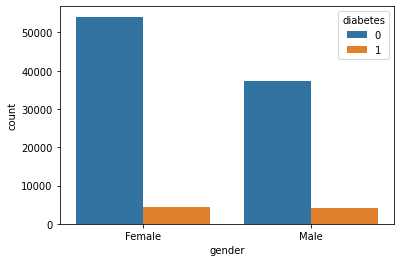

(0.0761886869790955, 0.09748974173304369)

In [250]:
sns.countplot(x= df1['gender'], hue= df1['diabetes'])
plt.show()
df1[df1['gender']== 'Female']['diabetes'].mean(), df1[df1['gender']== 'Male']['diabetes'].mean()

In [251]:
print(df1[df1['gender']=='Female']['diabetes'].mean())
print(df1[df1['gender']=='Male']['diabetes'].mean())

0.0761886869790955
0.09748974173304369


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'never'),
  Text(1, 0, 'No Info'),
  Text(2, 0, 'current'),
  Text(3, 0, 'former'),
  Text(4, 0, 'ever'),
  Text(5, 0, 'not current')])

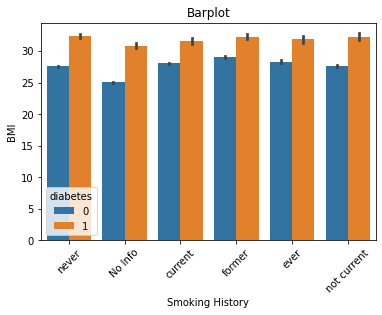

In [252]:
sns.barplot(x= 'smoking_history', y= 'bmi', hue= 'diabetes', data= df1)
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.title("Barplot")
plt.xticks(rotation= 45)

In [253]:
df1.columns
df1['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

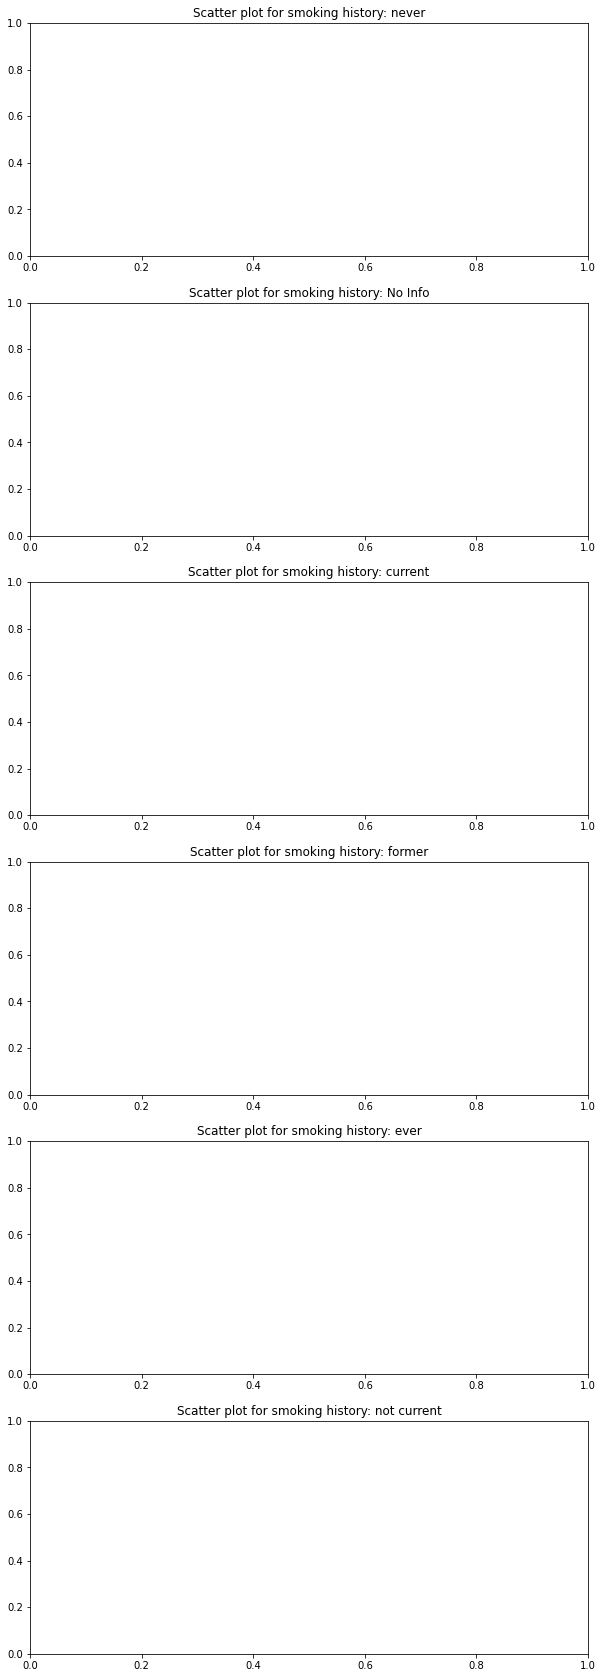

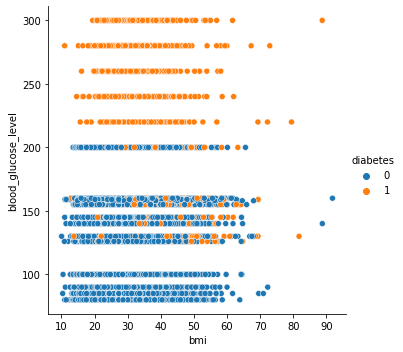

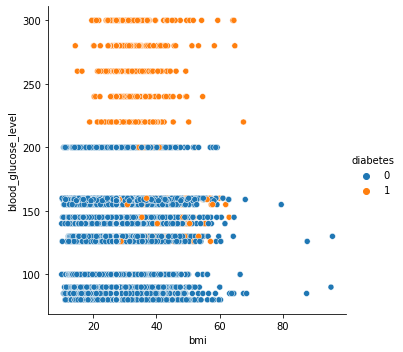

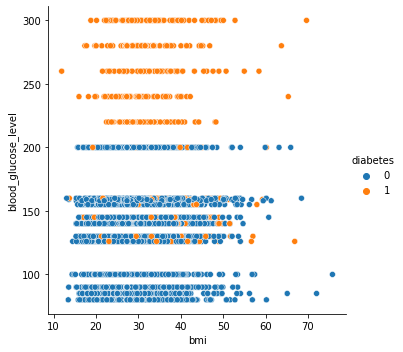

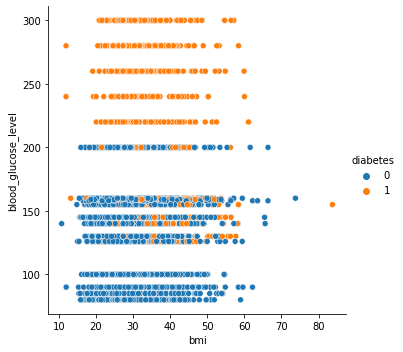

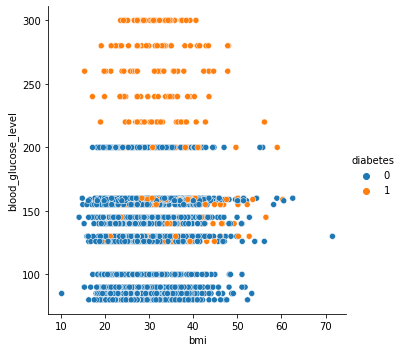

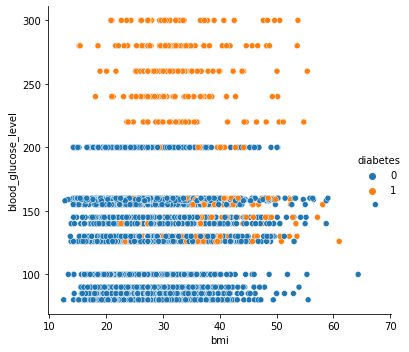

In [254]:

smoke= df1['smoking_history'].unique()

fig, axes= plt.subplots(len(smoke), 1, figsize= (10, 5*len(smoke)))

for i, smoke in enumerate(df1['smoking_history'].unique()):
    df_fil= df[df['smoking_history']== smoke]
    ax= axes[i]
#     ax.scatter(df_fil['bmi'], df_fil['blood_glucose_level'], c= df_fil['diabetes'])
    sns.relplot(x= df_fil['bmi'], y= df_fil['blood_glucose_level'], hue= df_fil['diabetes'], kind= 'scatter', ax= ax)
    ax.set_title(f'Scatter plot for smoking history: {smoke}')
    
plt.tight_layout()
plt.show()
    

Text(0.5, 1.0, 'Count of Hyperetension wrt Diabetes')

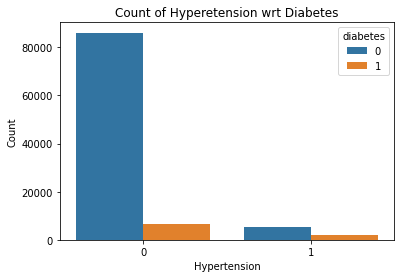

In [171]:
sns.countplot(df1['hypertension'], hue= df1['diabetes'])
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Count of Hyperetension wrt Diabetes')

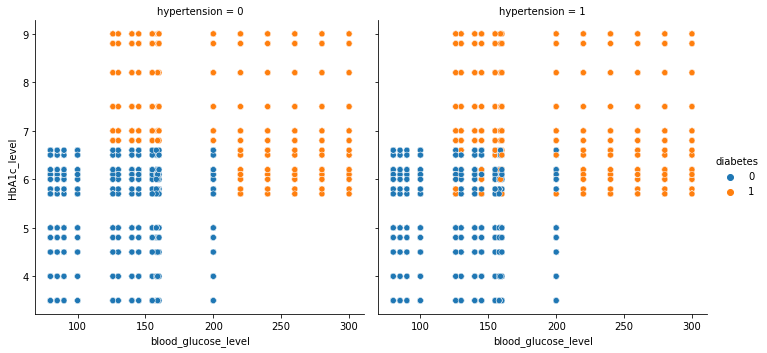

In [255]:
sns.relplot(y= df1['HbA1c_level'], x= df1['blood_glucose_level'], hue= df1['diabetes'], col= df1['hypertension'].astype('category'))

<AxesSubplot:>

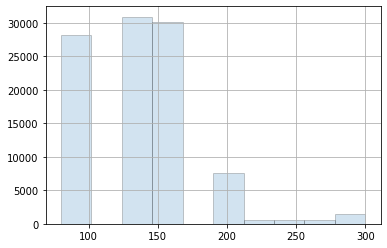

In [256]:
df1['blood_glucose_level'].hist(bins= 10, alpha= 0.2, edgecolor= 'black')

(array([ 50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

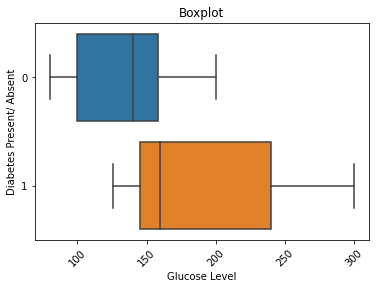

In [257]:
sns.boxplot(x= df1['blood_glucose_level'], y=df1['diabetes'].astype('category'))
plt.xlabel('Glucose Level')
plt.ylabel('Diabetes Present/ Absent')
plt.title('Boxplot')
plt.xticks(rotation= 45)

In [258]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [259]:
print(df1[df1['hypertension']==0]['diabetes'].mean())
print(df1[df1['hypertension']==1]['diabetes'].mean())


0.06932116717298939
0.27895791583166335


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

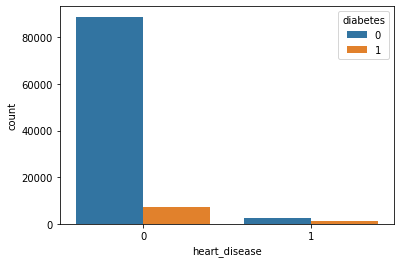

In [260]:
sns.countplot(df1['heart_disease'], hue= df1['diabetes'])

In [261]:
print(df1[df1['heart_disease']==0]['diabetes'].mean())
print(df1[df1['heart_disease']==1]['diabetes'].mean())

0.07531236984589754
0.32141045154743786


<AxesSubplot:xlabel='smoking_history', ylabel='count'>

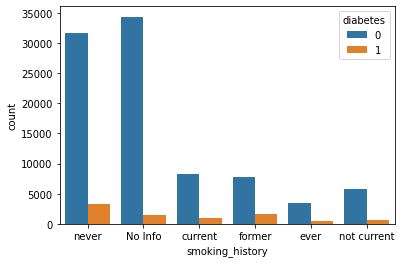

In [262]:
sns.countplot(df1['smoking_history'], hue= df1['diabetes'])

# Following chunk is very useful

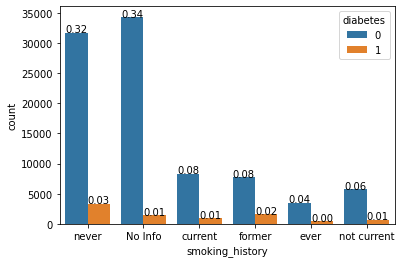

In [263]:
ax = sns.countplot(df1['smoking_history'], hue=df1['diabetes'])

# Calculate the proportions
total = len(df1)
for p in ax.patches:
    height = p.get_height()
    proportion = height / total
    x = p.get_x() + p.get_width() / 2
    y = height + 5
    ax.annotate(f'{proportion:.2f}', (x, y), ha='center')

plt.show()

In [264]:
print(df1[df1['smoking_history'] =='never']['diabetes'].mean())
print(df1[df1['smoking_history']=='current']['diabetes'].mean())

0.09534936737717999
0.10208916648718501


In [265]:
df2= pd.get_dummies(df1, columns= cat_cols)
print(df2.shape)
df2.head()

(99982, 15)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


In [266]:
df.shape

(100000, 9)

In [267]:
# df2= df2.drop('index', axis= 1)

In [268]:
# df3= pd.get_dummies(df1, columns= cat_cols, drop_first= True)
# print(df3.shape)
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


<AxesSubplot:xlabel='bmi'>

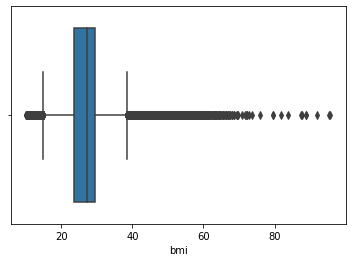

In [269]:
sns.boxplot(x= df1['bmi'])

<AxesSubplot:>

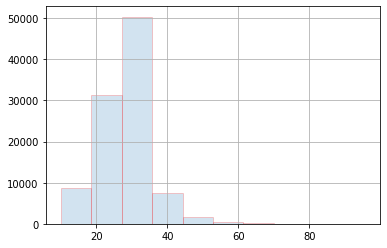

In [270]:
df2['bmi'].hist(bins= 10, alpha= 0.2, edgecolor= 'Red')

In [271]:
# plt.hist(df2['bmi'])

In [272]:
q3, q1= df2['bmi'].quantile([0.75, 0.25])
iqr= q3-q1
lob= q1- 1.5*iqr; uob= q3+ 1.5*iqr
lob,uob

(14.705, 38.504999999999995)

In [273]:
df2['bmi'].describe()

count    99982.000000
mean        27.320757
std          6.636853
min         10.010000
25%         23.630000
50%         27.320000
75%         29.580000
max         95.690000
Name: bmi, dtype: float64

In [274]:
df2[df2['bmi']>uob]['diabetes'].value_counts()/len(df2[df2['bmi']>uob])

0    0.754233
1    0.245767
Name: diabetes, dtype: float64

<AxesSubplot:>

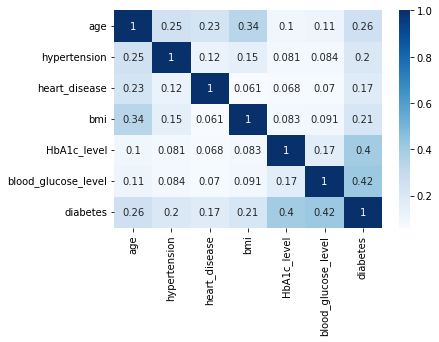

In [275]:
sns.heatmap(df1.corr(), cmap= 'Blues', annot= True)

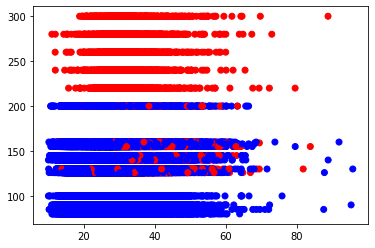

In [277]:
plt.scatter(x= df1['bmi'], y= df1['blood_glucose_level'], c= df1['diabetes'], cmap= 'bwr')


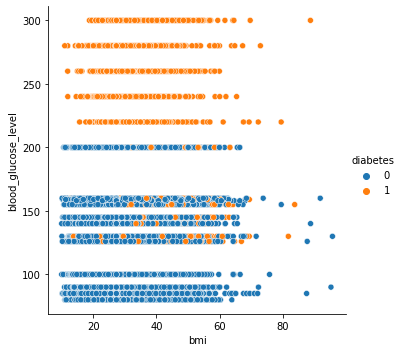

In [278]:
sns.relplot(x= df1['bmi'], y= df1['blood_glucose_level'], hue= df1['diabetes'])

In [280]:
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


In [281]:
from sklearn.preprocessing import StandardScaler

In [282]:
df2[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]= StandardScaler().fit_transform(df2[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [284]:
X= df2.drop('diabetes', axis= 1)
y= df2['diabetes']

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 123)

In [287]:
y_train.value_counts()

0    73140
1     6845
Name: diabetes, dtype: int64

In [288]:
from imblearn.over_sampling import SMOTE

In [289]:
smote= SMOTE()
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)

In [291]:
y_train.value_counts(), y_train_sm.value_counts()

(0    73140
 1     6845
 Name: diabetes, dtype: int64,
 0    73140
 1    73140
 Name: diabetes, dtype: int64)

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18342
           1       0.41      0.88      0.56      1655

    accuracy                           0.89     19997
   macro avg       0.70      0.88      0.75     19997
weighted avg       0.94      0.89      0.90     19997

[[16249  2093]
 [  205  1450]]
0.8850827624143621
0.881011618457103


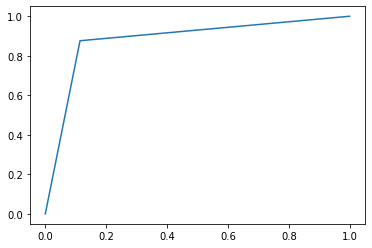

In [297]:
lr= LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
y_pred_lr= lr.predict(X_test)




print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

print(roc_auc_score(y_test, y_pred_lr))
fpr, tpr, _= roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr)
plt.show()

In [302]:
import statsmodels.api as sm

logistic_model = sm.Logit(y_train_sm, sm.add_constant(X_train_sm))
print(logistic_model.fit().summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               146280
Model:                          Logit   Df Residuals:                   146265
Method:                           MLE   Df Model:                           14
Date:                Fri, 26 May 2023   Pseudo R-squ.:                    -inf
Time:                        11:12:01   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                   -1.0139e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        -1.24e+08   3.76e+05   -329.895      0.000   -1.25e+08   -1.23e+08
age                

In [300]:
from sklearn.naive_bayes import GaussianNB

In [299]:
nb= GaussianNB()

NameError: name 'models' is not defined

In [303]:
from sklearn.model_selection import KFold, cross_val_score

In [307]:
k= 5
lr= LogisticRegression()
cv= KFold(n_splits= k, shuffle= True, random_state= 123)
scores= cross_val_score(lr, X, y, scoring= 'accuracy', cv= cv)
scores.max()

0.9616423284656931

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
# df1= df1.drop('index', axis= 1)
df1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [42]:
df2[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]= StandardScaler().fit_transform(df2[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [43]:
df2[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,9.998200e+04,9.998200e+04,9.998200e+04,9.998200e+04
mean,-9.162655e-17,2.343270e-16,-1.213937e-16,2.125745e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.856726e+00,-2.608291e+00,-1.893720e+00,-1.426157e+00
25%,-7.944220e-01,-5.561032e-01,-6.795148e-01,-9.348685e-01
50%,4.938133e-02,-1.139908e-04,2.544890e-01,4.770878e-02
75%,8.043633e-01,3.404106e-01,6.280905e-01,5.144330e-01
max,1.692577e+00,1.030151e+01,3.243301e+00,3.978018e+00


In [44]:
df2.head()
X= df2.drop('diabetes', axis= 1)
y= df2['diabetes']

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 123)
X.shape, X_train.shape, X_test.shape, y_test.shape

((99982, 14), (79985, 14), (19997, 14), (19997,))

In [46]:
y_train.value_counts()#/len(y_train)

0    73140
1     6845
Name: diabetes, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smote= SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_train_sm.shape, y_train_sm.value_counts()

((146280, 14),
 0    73140
 1    73140
 Name: diabetes, dtype: int64)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [50]:
lr= LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
y_pred_lr= lr.predict(X_test)
accuracy= accuracy_score(y_test, y_pred_lr)

print('Classification Report for Logistic', end= ":\n")
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix', end= ':\n')
print(confusion_matrix(y_test, y_pred_lr), end= '\n')
print(f'Accuracy score: {accuracy}')

Classification Report for Logistic:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18342
           1       0.41      0.88      0.56      1655

    accuracy                           0.88     19997
   macro avg       0.70      0.88      0.75     19997
weighted avg       0.94      0.88      0.90     19997

Confusion Matrix:
[[16241  2101]
 [  206  1449]]
Accuracy score: 0.8846326949042357


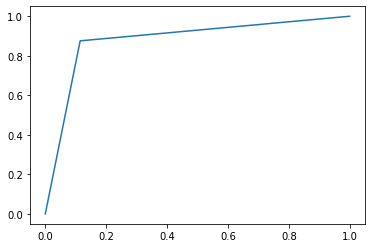

Area under the ROC curve: 0.8804914249270573


In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr)
plt.show()
auc_roc= roc_auc_score(y_test, y_pred_lr)
print(f'Area under the ROC curve: {auc_roc}')

In [101]:
import statsmodels.api as sm

In [104]:
x_train_sm1= sm.add_constant(X_train_sm)
Logit= sm.Logit(y_train_sm, X_train_sm)
model= Logit.fit()
print(model.summary())
# y_pred_prob= model.predict(sm.add_constant(X_test))
# y_pred= (y_pred_prob>=0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.243871
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               146280
Model:                          Logit   Df Residuals:                   146266
Method:                           MLE   Df Model:                           13
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.6482
Time:                        23:48:46   Log-Likelihood:                -35673.
converged:                       True   LL-Null:                   -1.0139e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
age                             1.2221      0.013     90.584      0.000   

# Not that important

In [55]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

X_train_sm1= sm.add_constant(X_train_sm)
LR= sm.Logit(y_train_sm,X_train_sm1)
model= LR.fit()
print('ANOVA TABLE', end= '\n_________________\n')
print(model.summary())

         Current function value: 0.243654
         Iterations: 35
ANOVA TABLE
_________________
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               146280
Model:                          Logit   Df Residuals:                   146265
Method:                           MLE   Df Model:                           14
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.6485
Time:                        20:27:20   Log-Likelihood:                -35642.
converged:                      False   LL-Null:                   -1.0139e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          35.4551   1742.832      0.020      0.984   -3380.

# K-Fold (# of folds used is 5)

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [57]:
k= 5
lr= LogisticRegression()
cv= KFold(n_splits= k, shuffle= True, random_state= 123)
scores_roc_auc= cross_val_score(lr, X, y, scoring= 'roc_auc', cv= cv)
scores_accuracy= cross_val_score(lr, X, y, scoring= 'accuracy', cv= cv)
print(f'Min, Average, Max of Area under the ROC: {scores_roc_auc.min(), scores_roc_auc.mean(), scores_roc_auc.max()}')
print(f'Min, Average, Max of Accuracy: {scores_accuracy.min(), scores_accuracy.mean(), scores_accuracy.max()}')

Min, Average, Max of Area under the ROC: (0.961299765207723, 0.961789582865384, 0.9629930120024687)
Min, Average, Max of Accuracy: (0.9586417283456692, 0.9602828416861049, 0.9616423284656931)


In [58]:
from sklearn.svm import SVC

In [59]:
# svm= SVC(kernel= 'linear')
# svm.fit(X_train_sm, y_train_sm)
# y_pred_svm= svm.predict(X_test)

# print(classification_report(y_test, y_pred_svm))

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
NB= GaussianNB()
NB.fit(X_train_sm, y_train_sm)
y_pred_NB= NB.predict(X_test)
accuracy= accuracy_score(y_test, y_pred_NB)

print('Classification Report for Logistic', end= ":\n")
print(classification_report(y_test, y_pred_NB))
print('Confusion Matrix', end= ':\n')
print(confusion_matrix(y_test, y_pred_NB), end= '\n')
print(f'Accuracy score: {accuracy}')

Classification Report for Logistic:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     18342
           1       0.34      0.81      0.48      1655

    accuracy                           0.85     19997
   macro avg       0.66      0.84      0.70     19997
weighted avg       0.93      0.85      0.88     19997

Confusion Matrix:
[[15728  2614]
 [  309  1346]]
Accuracy score: 0.8538280742111317


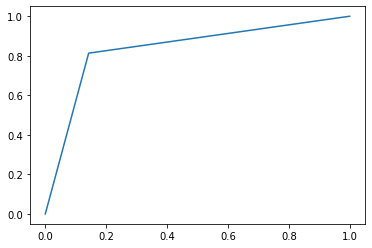

Area under the ROC curve: 0.8353893018219455


In [62]:
fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr)
plt.show()
auc_roc= roc_auc_score(y_test, y_pred_NB)
print(f'Area under the ROC curve: {auc_roc}')

In [63]:
k= 5
NB= GaussianNB()
cv= KFold(n_splits= k, shuffle= True, random_state= 123)
scores_roc_auc= cross_val_score(NB, X, y, scoring= 'roc_auc', cv= cv)
scores_accuracy= cross_val_score(NB, X, y, scoring= 'accuracy', cv= cv)
print(f'Min, Avg, Max of Area under the ROC with Naive Bayes: {scores_roc_auc.min(), scores_roc_auc.mean(), scores_roc_auc.max()}')
print(f'Min, Avg, Max of Accuracy with Naive Bayes: {scores_accuracy.min(), scores_accuracy.mean(), scores_accuracy.max()}')


Min, Avg, Max of Area under the ROC with Naive Bayes: (0.9038565163713059, 0.9103318416885058, 0.9149791450447695)
Min, Avg, Max of Accuracy with Naive Bayes: (0.8970794158831766, 0.9010822002376171, 0.9044308861772354)


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
KNN= KNeighborsClassifier(n_neighbors= 5)
KNN.fit(X_train_sm, y_train_sm)
y_pred_knn= KNN.predict(X_test)
accuracy= accuracy_score(y_test, y_pred_knn)

print("Classification Report with KNN:", end= "\n________________________\n")
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix:', end= "\n___________________\n")
print(confusion_matrix(y_test, y_pred_knn))
print(f'Accuracy of KNN: {accuracy}')

Classification Report with KNN:
________________________
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     18342
           1       0.49      0.82      0.61      1655

    accuracy                           0.91     19997
   macro avg       0.73      0.87      0.78     19997
weighted avg       0.94      0.91      0.92     19997

Confusion Matrix:
___________________
[[16917  1425]
 [  303  1352]]
Accuracy of KNN: 0.9135870380557084


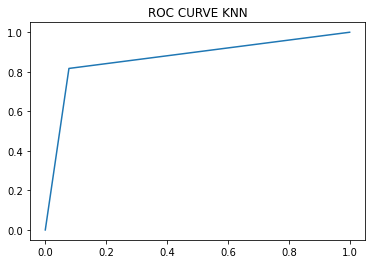

Area under the ROC curve with KNN: 0.8696139413579057


In [68]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.title('ROC CURVE KNN')
plt.show()
roc_auc_knn= roc_auc_score(y_test, y_pred_knn)
print(f'Area under the ROC curve with KNN: {roc_auc_knn}')

In [70]:
k= 5
knn= KNeighborsClassifier()
cv= KFold(n_splits= k, shuffle= True, random_state= 123)
scores= cross_val_score(knn, X, y, scoring= 'accuracy', cv= cv)
scores. min(), scores.mean(), scores.max()

(0.9598439765964895, 0.9606829252033334, 0.9616923384676935)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf= RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_pred_rf= rf.predict(X_test)

# print(rf)
accuracy= accuracy_score(y_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f'Accuracy: {accuracy}')

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18342
           1       0.74      0.76      0.75      1655

    accuracy                           0.96     19997
   macro avg       0.86      0.87      0.86     19997
weighted avg       0.96      0.96      0.96     19997

[[17895   447]
 [  391  1264]]
Accuracy: 0.9580937140571085


0.8711462738350659


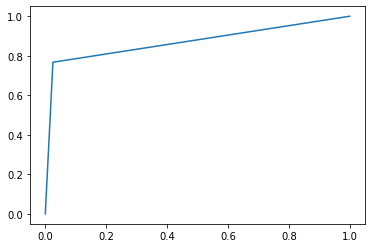

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr)
print(roc_auc_score(y_test, y_pred_rf))

In [74]:
k= 5
rf= RandomForestClassifier()
cv= KFold(n_splits= k, shuffle= True, random_state= 123)
scores= cross_val_score(rf, X, y, scoring= 'accuracy', cv= cv)
scores.min(), scores.mean(), scores.max()

(0.968493698739748, 0.9699845840048642, 0.9710956643496524)

In [75]:
from xgboost import XGBClassifier

In [79]:
xgb= XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb= xgb.predict(X_test)

print(xgb)

accuracy= accuracy_score(y_test, y_pred_xgb)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(f'Accuracy: {accuracy}')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18342
           1       0.92      0.71      0.80      1655

    accuracy                           0.97     19997
   macro avg       0.95      0.85      0.89     19997
weighted avg  

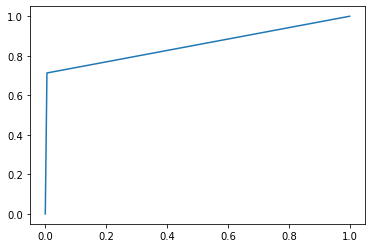

0.853796744038495


In [77]:
fpr, tpr, _= roc_curve(y_test, y_pred_xgb)
plt.plot(fpr, tpr)
plt.show()
print(roc_auc_score(y_test, y_pred_xgb))

In [78]:
k= 5
xgb= XGBClassifier()
cv= KFold(n_splits= k, shuffle= True, random_state= 123)
scores= cross_val_score(xgb, X, y, scoring= 'accuracy', cv= cv)
scores.min(), scores.mean(), scores.max()

(0.9699439887977596, 0.9714248465535483, 0.9728459268890334)

In [81]:
from sklearn.neural_network import MLPClassifier

In [92]:
clf= MLPClassifier(hidden_layer_sizes= (16,1), activation= 'relu', random_state= 123, max_iter= 400)
clf.fit(X_train_sm, y_train_sm)
y_pred_nn= clf.predict(X_test)

# weights= clf.coefs_
# biases= clf.intercepts_

# print(weights)
accuracy= accuracy_score(y_test, y_pred_nn)

print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))
print(accuracy)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18342
           1       0.50      0.87      0.64      1655

    accuracy                           0.92     19997
   macro avg       0.75      0.90      0.80     19997
weighted avg       0.95      0.92      0.93     19997

[[16922  1420]
 [  212  1443]]
0.9183877581637245


In [93]:
from sklearn.metrics import precision_score, recall_score

In [94]:
precision_score(y_test, y_pred_nn), recall_score(y_test, y_pred_nn)

(0.5040167656304576, 0.8719033232628399)

In [95]:
precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb)

(0.9225957779515246, 0.7129909365558912)

In [96]:
precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf)

(0.7387492694330801, 0.7637462235649547)

In [97]:
precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn)

(0.4868563197695355, 0.8169184290030211)

In [99]:
precision_score(y_test, y_pred_NB), recall_score(y_test, y_pred_NB)

(0.3398989898989899, 0.8132930513595166)

In [100]:
precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr)

(0.40816901408450706, 0.8755287009063444)